## steps to deploy tensorflow model using tensorflow serving

1. load library/ dependencies
2. create the model
3. save the model --> format must be like, folder name must be integer number like 0, 1, 2.... this interger number folder defines the version number of the model
and based on version number tensorflow serving choose the model to serve the response
save the model using , >>

tf.keras.models.save_model(

model_object,
absolute_path_of the model,

overwrite = True is you want to overwrite else false, (keep true),

include_optimizer  = True >>>> where, Optimizers are the extended class, which include added information to train a specific model 

save_format = None ...>>Either 'tf' or 'h5', indicating whether to save the model to Tensorflow SavedModel or HDF5. Defaults to 'tf' in TF 2.X, and 'h5' in TF 1.X.

options =  None ...>>Optional tf.saved_model.SaveOptions object that specifies options for saving to SavedModel.
)

4. Add TensorFlow Serving distribution URI as a package source

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

  5. install tensorflow-model-server
  6.Start running tensorflow server by defining modelname, port number, and path of the model
  os.environ["MODEL_DIR"] = MODEL_DIR

%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

  7. check wether server is on or not

!tail server.log

  8.create json api for prediciton

import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})


import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/2:predict', data=data1, headers=headers)
predictions = json.loads(json_response.text)['predictions']

  9. create show funstion to show the predicted and actual output

def show1(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(x_test)-1)
show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))


for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))

In [ ]:

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#1. load dependenices and create the model

import tensorflow as tf
import keras
from keras.layers import Dense, MaxPooling2D
from keras.models import Sequential
from keras import models

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reshape the input into 28*28 format
x_train = x_train.reshape(-1,28*28)/ 255.0
x_test = x_test.reshape(-1,28*28) / 255.0

# create the model

model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))

model.summary()

loss, acc = model.evaluate(x_test, y_test, verbose = 2)

print('model accurracy="{:5.2f}'.format(acc*100))

class_names = ['0','1','2','3','4','5','6','7','8','9']


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2020 - accuracy: 0.9413 - val_loss: 0.0983 - val_accuracy: 0.9691
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.0778 - val_accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0765 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0848 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0810 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0749 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0710 - val_accuracy:

In [ ]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

# MODEL_DIR = tempfile.gettempdir()
MODEL_DIR = '/home'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /home/1

INFO:tensorflow:Assets written to: /home/1/assets

Saved model:
total 76
drwxr-xr-x 2 root root  4096 Sep 11 07:57 assets
-rw-r--r-- 1 root root 67167 Sep 11 08:00 saved_model.pb
drwxr-xr-x 2 root root  4096 Sep 11 08:00 variables


In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   169k      0 --:--:-- --:--:-- --:--:--  169k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InR

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.3.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 77 not upgraded.


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=single_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 3 in a separate thread.


In [ ]:
!tail server.log

2020-09-11 08:01:20.484870: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /home/1
2020-09-11 08:01:20.487498: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 41355 microseconds.
2020-09-11 08:01:20.487874: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /home/1/assets.extra/tf_serving_warmup_requests
2020-09-11 08:01:20.487993: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: single_model version: 1}
2020-09-11 08:01:20.488892: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 8501
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now.
[evhttp

In [ ]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": x_test[0:3].tolist()})


<Response [200]>


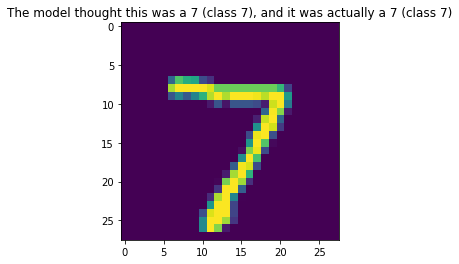

In [ ]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/single_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']
# print(json.loads(json_response.text))

print(json_response)
show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[y_test[0]], y_test[0]))